In [69]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
FTSE_df = pd.read_excel('FTSE_data.xlsx', index_col='Date')
FTSE_df.index = pd.to_datetime(FTSE_df.index)
FTSE_df = FTSE_df.iloc[:, ::-1]
FTSE_df = FTSE_df.iloc[::-1]

MSCI_df = pd.read_excel('MISCI_data.xlsx', index_col='Date')
MSCI_df.index = pd.to_datetime(MSCI_df.index)
MSCI_df = MSCI_df.iloc[:, ::-1]
MSCI_df = MSCI_df.iloc[::-1]

SP_df = pd.read_excel('S&P_data.xlsx', index_col='Date')
SP_df.index = pd.to_datetime(SP_df.index)
SP_df = SP_df.iloc[:, ::-1]
SP_df = SP_df.iloc[::-1]

print(FTSE_df)
print(MSCI_df)
print(SP_df)

             PX_LAST
Date                
2019-01-02  220.4594
2019-01-03  221.6079
2019-01-04  221.1291
2019-01-07  221.2585
2019-01-08  220.7902
...              ...
2024-04-08  209.6824
2024-04-09  210.5020
2024-04-10  208.1215
2024-04-11  207.2465
2024-04-12  207.5613

[1369 rows x 1 columns]
            PX_LAST
Date               
2019-01-01  1883.93
2019-01-02  1881.15
2019-01-03  1853.18
2019-01-04  1904.18
2019-01-07  1919.75
...             ...
2024-04-09  3412.09
2024-04-10  3379.73
2024-04-11  3391.01
2024-04-12  3351.01
2024-04-15  3317.68

[1380 rows x 1 columns]
             PX_LAST
Date                
2019-01-02  377.9058
2019-01-03  381.1982
2019-01-04  386.7994
2019-01-07  389.1942
2019-01-08  394.4705
...              ...
2024-04-08  599.1657
2024-04-09  595.7014
2024-04-10  598.0880
2024-04-11  594.1316
2024-04-12  598.3193

[1329 rows x 1 columns]


In [50]:
# get sharpe ratio

# daily returns
for asset_df in (FTSE_df, MSCI_df, SP_df): 
    asset_df['Daily Return'] = asset_df['PX_LAST'].pct_change()[1:]
    
# normalise returns
for asset_df in (FTSE_df, MSCI_df, SP_df): 
    asset_df['Normed Return'] = asset_df['PX_LAST'] /asset_df.iloc[0]['PX_LAST']

# portfolio weighting
for asset_df, allo in zip((FTSE_df, MSCI_df, SP_df),[.5,.3,.2]):
    asset_df['Allocation'] = asset_df['Normed Return']*allo
    
# value of each position
for asset_df in (FTSE_df, MSCI_df, SP_df):
    asset_df['Position Value'] = asset_df['Allocation']*500000000
    print(asset_df)

             PX_LAST  Normed Return  Allocation  Position Value  Daily Return
Date                                                                         
2024-04-12  207.5613       1.000000    0.500000    2.500000e+08           NaN
2024-04-11  207.2465       0.998483    0.499242    2.496208e+08     -0.001517
2024-04-10  208.1215       1.002699    0.501349    2.506747e+08      0.004222
2024-04-09  210.5020       1.014168    0.507084    2.535420e+08      0.011438
2024-04-08  209.6824       1.010219    0.505110    2.525548e+08     -0.003894
...              ...            ...         ...             ...           ...
2019-01-08  220.7902       1.063735    0.531867    2.659337e+08     -0.002983
2019-01-07  221.2585       1.065991    0.532996    2.664978e+08      0.002121
2019-01-04  221.1291       1.065368    0.532684    2.663419e+08     -0.000585
2019-01-03  221.6079       1.067674    0.533837    2.669186e+08      0.002165
2019-01-02  220.4594       1.062141    0.531071    2.655353e+08 

In [53]:
benchmark_returns_series = [FTSE_df['Daily Return'], MSCI_df['Daily Return'], SP_df['Daily Return']]
benchmark_returns_df = pd.concat(benchmark_returns_series, axis=1)
benchmark_returns = (benchmark_returns_df * [0.5, 0.3, 0.2]).sum(axis=1)
print(benchmark_returns)


Date
2019-01-01    0.000443
2019-01-02    0.000209
2019-01-03   -0.009849
2019-01-04   -0.003956
2019-01-07   -0.004100
                ...   
2024-04-09    0.007793
2024-04-10    0.002445
2024-04-11    0.001423
2024-04-12    0.003014
2024-04-15    0.000000
Freq: B, Length: 1380, dtype: float64
Date
2019-01-01    0.000443
2019-01-02    0.000209
2019-01-03   -0.009849
2019-01-04   -0.003956
2019-01-07   -0.004100
                ...   
2024-04-09    0.007793
2024-04-10    0.002445
2024-04-11    0.001423
2024-04-12    0.003014
2024-04-15    0.000000
Freq: B, Length: 1380, dtype: float64


In [59]:
portfolio_df = pd.read_excel('../all_data.xlsx')
portfolio_returns_df = portfolio_df.pct_change().dropna()
portfolio_returns = (portfolio_returns_df * [0.01, 0.05, 0.04, 0.15, 0.125, 0.075, 0.1, 0.05, 0.06, 0.04, 0.075, 0.075, 0.12, 0.03]).sum(axis=1)
print(portfolio_returns)

1     -0.012551
2     -0.021484
3      0.019579
4     -0.001359
5      0.018627
         ...   
251    0.000076
252    0.006164
253    0.006974
254    0.007550
255    0.013258
Length: 255, dtype: float64


The portfolio beta is -0.2593


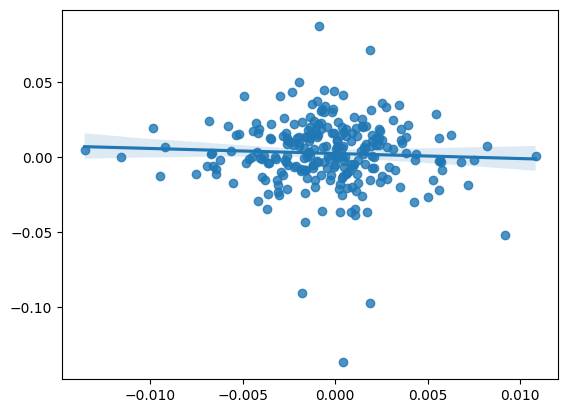

In [73]:
sns.regplot(x=benchmark_returns.values[:255], y=portfolio_returns.values)
(beta, alpha) = stats.linregress(benchmark_returns.values[-255:], portfolio_returns.values)[0:2]
print("The portfolio beta is", round(beta, 4))

In [48]:
# create list of all position values
returns_series = [FTSE_df['Normed Return'], MSCI_df['Normed Return'], SP_df['Normed Return']]

# concatenate the list of position values
returns_df = pd.concat(returns_series, axis=1)

# set the column names
returns_df.columns = ['Fixed Income (FTSE)', 'Equities(MSCI)', 'Commodities (S&P)']
returns_df = returns_df.dropna()
print(returns_df)

# calculate daily returns for each 
returns = []
for asset in ('Fixed Income (FTSE)', 'Equities(MSCI)', 'Commodities (S&P)'):
    daily_returns = [0.0]
    normalised_prices = returns_df[asset]
    normalised_prices_array = normalised_prices.values
    for i in range(1, len(normalised_prices_array)):
        
        daily_returns.append(normalised_prices_array[i] / normalised_prices_array[i-1] - 1)
    returns.append(daily_returns)

# corr_matrix = np.corrcoef(returns)
# print(corr_matrix)

# w = np.array([.5,.3,.2])
# volatility = np.sqrt(w.T.dot(corr_matrix).dot(w))
# print(volatility)

            Fixed Income (FTSE)  Equities(MSCI)  Commodities (S&P)
Date                                                              
2019-01-02             1.062141        0.567008           0.631612
2019-01-03             1.067674        0.558577           0.637115
2019-01-04             1.065368        0.573949           0.646477
2019-01-07             1.065991        0.578642           0.650479
2019-01-08             1.063735        0.583477           0.659298
...                         ...             ...                ...
2024-04-08             1.010219        1.027396           1.001415
2024-04-09             1.014168        1.028457           0.995625
2024-04-10             1.002699        1.018703           0.999613
2024-04-11             0.998483        1.022103           0.993001
2024-04-12             1.000000        1.010046           1.000000

[1329 rows x 3 columns]
[[ 1.          0.18151128 -0.01597669]
 [ 0.18151128  1.          0.34355726]
 [-0.01597669  0.34355726 

In [41]:
# create list of all position values
all_pos_vals = [FTSE_df['Position Value'], MSCI_df['Position Value'], SP_df['Position Value']]

# concatenate the list of position values
portfolio_val = pd.concat(all_pos_vals, axis=1)

# set the column names
portfolio_val.columns = ['Fixed Income (FTSE)', 'Equities(MSCI)', 'Commodities (S&P)']

# add a total portfolio column
portfolio_val['Total'] = portfolio_val.sum(axis=1)
print(portfolio_val.tail(20))
portfolio_val.dropna(inplace=True)


portfolio_val['Daily Return'] = portfolio_val['Total'].pct_change(1)
sharpe_ratio = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
print(sharpe_ratio)
print(portfolio_val)

            Fixed Income (FTSE)  Equities(MSCI)  Commodities (S&P)  \
Date                                                                 
2024-03-19         2.533495e+08    1.534221e+08       9.742430e+07   
2024-03-20         2.535056e+08    1.543951e+08       9.646115e+07   
2024-03-21         2.537542e+08    1.552903e+08       9.642768e+07   
2024-03-22         2.541147e+08    1.549932e+08       9.600880e+07   
2024-03-25         2.539365e+08    1.546343e+08       9.689858e+07   
2024-03-26         2.540647e+08    1.543680e+08       9.619757e+07   
2024-03-27         2.546383e+08    1.553938e+08       9.591623e+07   
2024-03-28         2.544187e+08    1.553848e+08       9.735245e+07   
2024-03-29         2.544291e+08    1.554291e+08                NaN   
2024-04-01         2.529479e+08    1.548400e+08       9.758724e+07   
2024-04-02         2.523428e+08    1.538756e+08       9.870524e+07   
2024-04-03         2.529026e+08    1.541568e+08       9.945038e+07   
2024-04-04         2

In [39]:
# calculate volatitily
DailyVolatility = statistics.stdev(portfolio_val['Daily Return'])
print("The daily volatility is: {:.2%}".format(DailyVolatility))
AnnualizedDailyVolatilityTradingDays = DailyVolatility*np.sqrt(252)
print("The annualized daily volatility measured in trading days is: {:.2%}".format(AnnualizedDailyVolatilityTradingDays))

The daily volatility is: 26.61%
The annualized daily volatility measured in trading days is: 508.32%


In [31]:
FTSE_df = pd.read_excel('FTSE_data.xlsx', index_col='Date')
FTSE_df.index = pd.to_datetime(FTSE_df.index)
MSCI_df = pd.read_excel('MISCI_data.xlsx', index_col='Date')
MSCI_df.index = pd.to_datetime(MSCI_df.index)
SP_df = pd.read_excel('S&P_data.xlsx', index_col='Date')
SP_df.index = pd.to_datetime(SP_df.index)

total_df = pd.concat([FTSE_df, MSCI_df, SP_df], axis=1)
total_df.columns = ['Fixed Income (FTSE)', 'Equities(MSCI)', 'Commodities (S&P)']
log_return = np.log(total_df/total_df.shift(1))

weights = [.5,.3,.2]
weights_array = np.array(weights)
# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights_array)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights_array.T,np.dot(log_return.cov()*252, weights_array)))
print(exp_vol)

Expected Portfolio Return
0.05179659180907359
Expected Volatility
0.09276955799286218
